# WNS Analytics Wizard 2019

## 1.0 Getting Started

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# setting the path
os.chdir("/content/gdrive/My Drive/Colab Notebooks/WNS")

In [0]:
# Importing the dataset
Train = pd.read_csv("./Input/train_NA17Sgz/train.csv")
Item = pd.read_csv("./Input/train_NA17Sgz/item_data.csv")
View = pd.read_csv("./Input/train_NA17Sgz/view_log.csv")
Test = pd.read_csv("./Input/test_aq1FGdB/test.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_IPsBlCT/sample_submission.csv")

## 2.0 Glimpse of data

In [5]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

print("Number of rows and columns in Item dataset:",Item.shape)
print("Number of rows and columns in View dataset:",View.shape)

Number of rows and columns in train dataset: (237609, 7)
Number of rows and columns in test dataset: (90675, 6)
Number of rows and columns in Item dataset: (132761, 6)
Number of rows and columns in View dataset: (3118622, 5)


In [6]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

print("-----------------Variable Structure of item data--------------")
Item.info()
print("-----------------Variable Structure of view data------------------")
View.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB
-----------------Variable Structure of test data------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 6 columns):
impression_id      90675 non-null object
impression_time    90675 non-null object
user_id            90675 non-null int64
app_code           90675 non-null int64
os_version         90675 non-null object
is_4G              90675 non-null int64
dtypes: int64(3), object(3)
memory usage: 4.2+ MB
--------------

In [7]:
Train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


## 3.0 EDA

In [8]:
# Merging Product data into log data
View_log = pd.merge(View,Item,on='item_id',how='left')
View_log.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [9]:
# Checking Missing values
print("Total missing value:", View_log.isnull().sum().sum())
print("% missing value:", View_log.isnull().sum().sum()/View_log.shape[0])
print("Missing value by variable wise:")
View_log.isnull().sum()

Total missing value: 8910
% missing value: 0.0028570310861656205
Missing value by variable wise:


server_time        0
device_type        0
session_id         0
user_id            0
item_id            0
item_price      1782
category_1      1782
category_2      1782
category_3      1782
product_type    1782
dtype: int64

In [10]:
# Removing Missing value
View_log = View_log.dropna()

print("Total missing value:", View_log.isnull().sum().sum())
print("% missing value:", View_log.isnull().sum().sum()/View_log.shape[0])


Total missing value: 0
% missing value: 0.0


In [11]:
# Shape of data
print("Shape of View_log data:", View_log.shape)

Shape of View_log data: (3116840, 10)


In [12]:
View_log["server_time"]= pd.to_datetime(View_log["server_time"])
View_log['day'] = View_log['server_time'].dt.day.astype('object')
View_log['hour'] = View_log['server_time'].dt.hour.astype('object')
View_log.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,day,hour
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0,15,8
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0,15,8
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0,15,8
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0,15,8
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0,15,8


In [13]:
print("Unique Session id:", len(View_log['session_id'].unique()))
print("Unique Device type:",len(View_log['device_type'].unique()))
print("Unique item id:",len(View_log['item_id'].unique()))
print("Unique user id:",len(View_log['user_id'].unique()))
print("Unique category_1 id:",len(View_log['category_1'].unique()))
print("Unique category_2 id:",len(View_log['category_2'].unique()))
print("Unique category_3 id:",len(View_log['category_3'].unique()))
print("Unique product_type id:",len(View_log['product_type'].unique()))

Unique Session id: 1014725
Unique Device type: 3
Unique item id: 126607
Unique user id: 89152
Unique category_1 id: 17
Unique category_2 id: 79
Unique category_3 id: 335
Unique product_type id: 7846


In [14]:
!pip install pandasql
import pandasql as pdsql

View_log_temp = View_log[['user_id', 'session_id']]

pysql = lambda q: pdsql.sqldf(q, globals())
str1 = "select user_id, session_id from View_log_temp group by user_id, session_id"
df1 = pysql(str1)
df1.head()

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=568eb60a1f4e0a987b27054dee957a1599ca31310fcbef2ec3d14646be0b8715
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


,user_id,session_id
0,0,86373
1,0,143955
2,0,144465
3,0,191704
4,0,268465


In [15]:
str2 = "select user_id, count(*) as session_count from df1 group by user_id"
df2 = pysql(str2)
df2.head()

,user_id,session_count
0,0,11
1,1,3
2,2,37
3,3,1
4,4,1


In [16]:
View_log_temp = View_log[['user_id', 'item_id']]

pysql = lambda q: pdsql.sqldf(q, globals())
str3 = "select user_id, item_id from View_log_temp group by user_id, item_id"
df3 = pysql(str3)

str4 = "select user_id, count(*) as item_count from df3 group by user_id"
df4 = pysql(str4)
df4.head()

,user_id,item_count
0,0,18
1,1,8
2,2,130
3,3,3
4,4,2


In [17]:
View_log_temp = View_log[['user_id', 'item_price']]

pysql = lambda q: pdsql.sqldf(q, globals())
str5 = "select user_id, AVG(item_price) as AVG_price from View_log_temp group by user_id"
df5 = pysql(str5)
df5.head()

,user_id,AVG_price
0,0,9395.666667
1,1,3946.750000
2,2,14809.509091
3,3,7257.375000
4,4,30114.500000


In [18]:
dataframe = pd.merge(df2, df4, on = 'user_id', how = 'left')
dataframe = pd.merge(dataframe, df5, on = 'user_id', how = 'left')

dataframe.head()

,user_id,session_count,item_count,AVG_price
0,0,11,18,9395.666667
1,1,3,8,3946.750000
2,2,37,130,14809.509091
3,3,1,3,7257.375000
4,4,1,2,30114.500000


In [0]:
X = dataframe.drop(['user_id'], axis = 1).values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

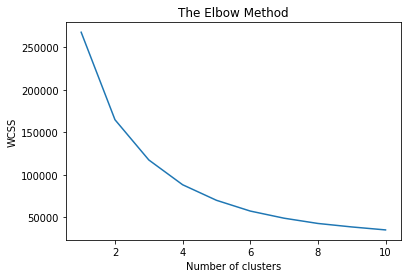

[267456.0, 164700.3085593498, 117499.44029445204, 88383.48169805776, 70126.60189741192, 57485.560200589374, 49099.65611698531, 42927.1119380681, 38834.308777413375, 35340.69690869667]


In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print(wcss)

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
dataframe['Cluster'] = kmeans.fit_predict(X)

dataframe.head()

,user_id,session_count,item_count,AVG_price,Cluster
0,0,11,18,9395.666667,5
1,1,3,8,3946.750000,5
2,2,37,130,14809.509091,0
3,3,1,3,7257.375000,5
4,4,1,2,30114.500000,1


## 4.0 Machine learning

### 4.1 Data Pre-processing

In [22]:
Train['datatype'] = "train"
Test['datatype'] = "test"

data = pd.concat([Train, Test], axis = 0)
print(data.head())

data.datatype.value_counts()

   app_code datatype  ...    os_version user_id
0       422    train  ...           old   87862
1       467    train  ...        latest   63410
2       259    train  ...  intermediate   71748
3       244    train  ...        latest   69209
4       473    train  ...        latest   62873

[5 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


train    237609
test      90675
Name: datatype, dtype: int64

In [23]:
# Merging from log data
dataframe = dataframe[['user_id', 'Cluster']]
data = pd.merge(data, dataframe, on = 'user_id', how = 'left')
data.head()

,app_code,datatype,impression_id,impression_time,is_4G,is_click,os_version,user_id,Cluster
0,422,train,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862,5.0
1,467,train,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410,5.0
2,259,train,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748,5.0
3,244,train,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209,5.0
4,473,train,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873,2.0


In [0]:
# Function for Feature engineering
def Feature_eng(Train):
 
  Train['app_code'] = Train['app_code'].astype('object')
  Train['Cluster'] = Train['Cluster'].astype('object')
  Train["impression_time"]= pd.to_datetime(Train["impression_time"])
  Train['day'] = Train['impression_time'].dt.day.astype('object')
  Train['Week'] = np.where(Train['day'] > 21 , ">21",
                                      np.where(Train['day'] > 14 , "14-21", 
                                               np.where(Train['day'] > 7 , "7-14", "1-7")))
  Train['hour'] = Train['impression_time'].dt.hour.astype('object')
  Train_temp = pd.get_dummies(Train[["app_code","day", "Week","hour","os_version", "Cluster"]], prefix=["app_code","day", "Week","hour","os_version", "Cluster"])
  Train_v2 = pd.concat([Train, Train_temp], axis = 1)
  Train_v2 = Train_v2.drop(columns=['impression_id','impression_time','user_id','app_code','os_version','day', 'Week','hour', 'Cluster'])
  return Train_v2

In [25]:
# Calling Feature engineering function
data_v2 = Feature_eng(data)

print("Number of rows and variables in train data:", data_v2.shape)

data_v2.head()

Number of rows and variables in train data: (328284, 593)


,datatype,is_4G,is_click,app_code_0,app_code_1,app_code_2,app_code_3,app_code_4,app_code_5,app_code_6,app_code_7,app_code_8,app_code_9,app_code_10,app_code_11,app_code_12,app_code_13,app_code_14,app_code_15,app_code_16,app_code_17,app_code_18,app_code_19,app_code_20,app_code_21,app_code_22,app_code_23,app_code_24,app_code_25,app_code_26,app_code_27,app_code_28,app_code_29,app_code_30,app_code_31,app_code_32,app_code_33,app_code_34,app_code_35,app_code_36,...,day_29,day_30,Week_1-7,Week_14-21,Week_7-14,Week_>21,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,os_version_intermediate,os_version_latest,os_version_old,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_4.0,Cluster_5.0,Cluster_6.0
0,train,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,train,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,train,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,train,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,train,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [26]:
Train = data_v2[data_v2['datatype'] == 'train']
Test = data_v2[data_v2['datatype'] == 'test']

Train = Train.drop(['datatype'], axis = 1)
Test = Test.drop(['is_click', 'datatype'], axis = 1)

print("Number of rows and variables in train data:", Train.shape)
print("Number of rows and variables in test data:", Test.shape)

Number of rows and variables in train data: (237609, 592)
Number of rows and variables in test data: (90675, 591)


In [27]:
# Distribution of target variable
print("The unique number of Categories: ",len(Train['is_click'].unique()))
print("Below are the distribution of each categories in Train data:")
Train['is_click'].value_counts(normalize = True)

The unique number of Categories:  2
Below are the distribution of each categories in Train data:


0.0    0.954286
1.0    0.045714
Name: is_click, dtype: float64

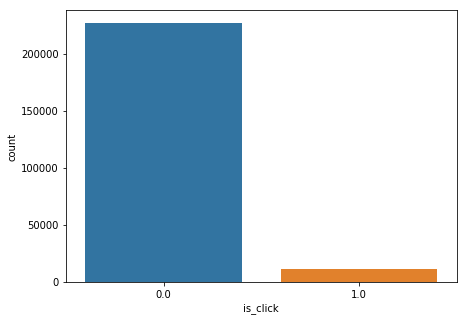

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'is_click', data = Train);

### 4.2 Splitting into X and y

In [0]:
# Splitting into X and y
X = Train.drop(columns=['is_click']).values
y = Train['is_click'].values

### 4.3 Dividing data into train and validation set

Before training the model, let's split the training data into a training and validation set.

In [30]:
# Dividing data into train and validation set
from sklearn.model_selection import train_test_split

validation_percent = 0.30
test_percent = 0.50
seed = 786

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_percent, random_state = seed, stratify = y)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size = test_percent, random_state = seed, stratify = y_validation)

# Shape of data
print("Number of rows and columns in train dataset:",X_train.shape)
print("Number of rows and columns in validation dataset:",X_validation.shape)
print("Number of rows and columns in test dataset:",X_test.shape)

print("Number of rows and columns in target variable for training:",y_train.shape)
print("Number of rows and columns in target variable for validation:",y_validation.shape)
print("Number of rows and columns in target variable for test:",y_test.shape)

Number of rows and columns in train dataset: (166326, 591)
Number of rows and columns in validation dataset: (35641, 591)
Number of rows and columns in test dataset: (35642, 591)
Number of rows and columns in target variable for training: (166326,)
Number of rows and columns in target variable for validation: (35641,)
Number of rows and columns in target variable for test: (35642,)


### 4.4 Checking various models

#### 4.4.1 Logistic Regression

In [31]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

seed = 786
LR = LogisticRegression(penalty='l2', class_weight = 'balanced', random_state=seed,C=1)

model_LR = LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
#prob1=model_LR.predict_proba(X_validation)[:,1]
#y_predict_LR=[1 if i > 0.57 else 0 for i in prob1]
y_predict_LR = model_LR.predict(X_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
AUC_scores_holdout = roc_auc_score(y_validation, y_predict_LR)
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     34012
         1.0       0.08      0.73      0.14      1629

    accuracy                           0.58     35641
   macro avg       0.53      0.65      0.43     35641
weighted avg       0.94      0.58      0.70     35641

F1 Score for hold-out sample data: 43.01
AUC Score for hold-out sample data: 65.07


In [0]:
def accuracy_summary(classifier, X_train, y_train, X_validation, y_validation):
    t0 = time()
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    train_test_time = time() - t0
    accuracy = roc_auc_score(y_validation, y_pred)
    return accuracy, train_test_time

In [0]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import f1_score, classification_report

names = ["Logistic Regression", "SGDClassifier", "Linear SVC", "LinearSVC with L1-based feature selection","Gaussian SVM",
         "Gaussian NB", "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Randomforest", "GradientBoosting",
         "ExtremeGradientBoosting","Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    GaussianNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]

zipped_clf = zip(names,classifiers)

def classifier_comparator(classifier=zipped_clf):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [35]:
classifier_result = classifier_comparator()
classifier_result

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Validation result for SGDClassifier
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
         

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Validation result for Gaussian SVM
GaussianNB(priors=None, var_smoothing=1e-09)
Validation result for Gaussian NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Validation result for Bernoulli NB
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)
Validation result for Ridge Classifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Validation result for AdaBoost
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation result for Randomforest
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Validation result for GradientBoosting
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_esti

[('Logistic Regression', 0.5, 1.7173597812652588),
 ('SGDClassifier', 0.5, 2.8605594635009766),
 ('Linear SVC', 0.49998529930612723, 5.513771295547485),
 ('LinearSVC with L1-based feature selection',
  0.49998529930612723,
  13.315014362335205),
 ('Gaussian SVM', 0.49885546660417474, 2.2175464630126953),
 ('Gaussian NB', 0.5001893312200432, 1.6033282279968262),
 ('Bernoulli NB', 0.49998529930612723, 3.065272808074951),
 ('Ridge Classifier', 0.5, 124.84736394882202),
 ('AdaBoost', 0.5084575465258461, 18.737553596496582),
 ('Randomforest', 0.5, 650.4432380199432),
 ('GradientBoosting', 0.5, 170.13241529464722),
 ('ExtremeGradientBoosting', 0.5101947552255959, 1.9462151527404785),
 ('Perceptron', 0.508055772681826, 3.128899574279785),
 ('Passive-Aggresive', 0.6038645985416478, 0.5778987407684326)]

In [36]:
classifier_result_df = pd.DataFrame(classifier_result)
classifier_result_df.columns = ['Classifier', 'AUC-Score', 'Train and test time']
classifier_result_df.sort_values(by='AUC-Score', ascending=False)

,Classifier,AUC-Score,Train and test time
13,Passive-Aggresive,0.603865,0.577899
11,ExtremeGradientBoosting,0.510195,1.946215
8,AdaBoost,0.508458,18.737554
12,Perceptron,0.508056,3.128900
5,Gaussian NB,0.500189,1.603328
0,Logistic Regression,0.500000,1.717360
1,SGDClassifier,0.500000,2.860559
7,Ridge Classifier,0.500000,124.847364
9,Randomforest,0.500000,650.443238
10,GradientBoosting,0.500000,170.132415


In [41]:
# Predicting test output
y_predict = model_LR.predict(Test)
Test_chk = pd.read_csv("./Input/test_aq1FGdB/test.csv")
Submission = pd.DataFrame()
Submission['impression_id'] = Test_chk['impression_id']
Submission['is_click'] = y_predict
Submission.head()
Submission['is_click'].value_counts()

0.0    53748
1.0    36927
Name: is_click, dtype: int64

In [0]:
# Exporting output
Submission.to_csv("./Output/Output_v2.csv", index = False)